In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [107]:
df_train = pd.read_csv("../data/train_data.csv")
df_test = pd.read_csv("../data/test_data.csv")
print(f"row counts: {len(df_train)}")
df_train.rename(columns={'Per capita': 'Per capita personal income', 'Per Capita (dollars)': 'Revenue Per Capita (dollars)'}, inplace=True)
df_test.rename(columns={'Per capita': 'Per capita personal income',  'Per Capita (dollars)': 'Revenue Per Capita (dollars)'}, inplace=True)
# df_train.iloc[:,-17:].describe()
df_train.describe()

row counts: 120320


,CPI,Revenue Per Capita (dollars),population,violent_crime,homicide,rape,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,GDP,state_personal_consumption,Per capita personal income,Personal income,Unemployment Rates
count,120320.000000,120320.000000,1.203200e+05,120320.000000,120320.000000,120320.000000,120320.000000,120320.000000,1.203200e+05,120320.000000,120320.000000,120320.000000,1.203200e+05,1.203200e+05,120320.000000,1.203200e+05,120320.000000
mean,243.517021,1700.423856,1.480700e+07,59422.425806,730.568617,5718.650914,16521.587974,36450.808935,3.487389e+05,62847.600283,245901.316523,39989.971002,8.528870e+05,6.199752e+05,52605.289902,7.982995e+11,4.585547
std,5.431382,657.265247,1.153449e+07,53119.143063,556.853886,4554.958381,16528.463427,32079.984393,3.016639e+05,56305.815212,198125.918527,51516.837550,7.395509e+05,4.976540e+05,7500.969510,6.633313e+11,0.835643
min,234.722000,531.469599,5.776010e+05,1235.000000,10.000000,171.000000,59.000000,802.000000,1.030800e+04,1551.000000,7974.000000,592.000000,3.697280e+04,2.302270e+04,35196.000000,3.175650e+10,1.900000
25%,238.316000,1263.898537,6.108612e+06,22101.000000,285.000000,2114.000000,5266.000000,12334.000000,1.387020e+05,23490.000000,100995.000000,11778.000000,3.379086e+05,2.537925e+05,46343.000000,3.213462e+11,4.000000
50%,242.839000,1546.802092,1.031362e+07,37118.000000,596.000000,4216.000000,9854.000000,22942.000000,2.319410e+05,39317.000000,171393.000000,17692.000000,5.388854e+05,4.193615e+05,51985.000000,5.452467e+11,4.600000
75%,247.867000,1948.342146,2.065659e+07,85606.000000,1061.000000,7598.000000,20175.000000,58016.000000,5.271250e+05,88835.000000,395375.000000,41165.000000,9.362762e+05,8.743253e+05,58040.000000,1.066354e+12,5.100000
max,252.885000,3390.548052,3.946159e+07,178597.000000,1930.000000,15506.000000,56625.000000,105418.000000,1.024914e+06,197404.000000,656517.000000,176756.000000,2.673164e+06,1.835635e+06,73984.000000,2.473807e+12,7.300000


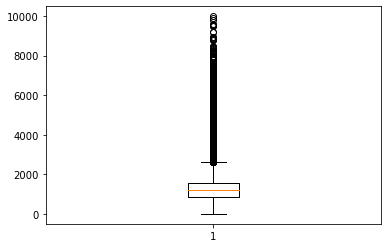

<Figure size 720x504 with 0 Axes>

715.5742908615287 2643.5174376417303 -218.7797258043845


In [27]:
# finding the 1st quartile
q1 = np.quantile(zoriArr, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(zoriArr, 0.75)
med = np.median(zoriArr)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

zoriArr = df_train.Zori.to_numpy()
zoriArr = zoriArr[(zoriArr >= lower_bound) & (zoriArr <= upper_bound)]

plt.boxplot(zoriArr)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [93]:
df_train = df_train[(df_train.Zori < upper_bound) & (df_train.Zori > lower_bound)]
df_test = df_test[(df_test.Zori < upper_bound) & (df_test.Zori > lower_bound)]
print(f"row counts: {len(df_train)}")
df_train.describe()

row counts: 115523


,CityID,Zori,Year,Month,Ada,Adams,Alameda,Allegheny,Anne Arundel,Anoka,...,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,GDP,state_personal_consumption,Per capita personal income,Personal income,Unemployment Rates
count,115523.000000,1.155230e+05,115523.000000,115523.000000,115523.000000,115523.000000,115523.000000,115523.000000,115523.000000,115523.000000,...,115523.000000,1.155230e+05,115523.000000,115523.000000,115523.000000,1.155230e+05,1.155230e+05,115523.000000,1.155230e+05,115523.000000
mean,66434.895726,1.170550e+03,2016.520736,6.609290,0.002441,0.004371,0.003471,0.009063,0.005289,0.002848,...,34981.261688,3.356274e+05,60554.160548,237676.400249,37396.806376,8.134180e+05,5.939405e+05,52352.362205,7.625695e+11,4.578958
std,141823.143066,5.629913e+02,1.107761,3.392472,0.049347,0.065972,0.058815,0.094768,0.072533,0.053290,...,30871.557747,2.906413e+05,54324.905621,192099.507756,48610.468606,7.052539e+05,4.756092e+05,7474.827259,6.321333e+11,0.838216
min,3304.000000,3.832384e-25,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,802.000000,1.030800e+04,1551.000000,7974.000000,592.000000,3.697280e+04,2.302270e+04,35196.000000,3.175650e+10,1.900000
25%,16968.500000,8.232991e+02,2016.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12059.000000,1.380120e+05,23489.000000,99707.000000,11716.000000,3.302125e+05,2.489993e+05,46203.000000,3.130929e+11,4.000000
50%,32228.000000,1.166054e+03,2017.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22752.000000,2.223940e+05,38819.000000,165434.000000,17476.000000,5.354636e+05,4.124210e+05,51771.000000,5.354825e+11,4.600000
75%,46805.000000,1.509960e+03,2018.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55551.000000,4.860170e+05,74760.000000,372919.000000,41165.000000,9.083357e+05,8.743253e+05,57841.000000,1.016647e+12,5.100000
max,839919.000000,2.643457e+03,2018.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,105418.000000,1.024914e+06,197404.000000,656517.000000,176756.000000,2.673164e+06,1.835635e+06,73984.000000,2.473807e+12,7.300000


In [94]:
# X_train_2 = df_train.iloc[:, -17:]
X_train = df_train.drop(['Zori', 'State'], axis=1)
y_train = df_train['Zori']

# X_test_2 = df_test.iloc[:, -17:]
X_test = df_test.drop(['Zori', 'State'], axis=1)
y_test = df_test['Zori']

In [77]:
X_train
# found = X_train[X_train['State'].str.contains('NM')]
# print(found.count())

,CityID,Year,Month,Ada,Adams,Alameda,Allegheny,Anne Arundel,Anoka,Arapahoe,...,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,GDP,state_personal_consumption,Per capita personal income,Personal income,Unemployment Rates
0,12447,2015,2,0,0,0,0,0,0,0,...,99349,1024914,197404,656517,170993,2332010.5,1581389.3,53646.0,2.084190e+12,6.7
1,54296,2015,2,0,0,0,0,0,0,0,...,99349,1024914,197404,656517,170993,2332010.5,1581389.3,53646.0,2.084190e+12,6.7
2,33839,2015,2,0,0,0,0,0,0,0,...,99349,1024914,197404,656517,170993,2332010.5,1581389.3,53646.0,2.084190e+12,6.7
3,20288,2015,2,0,0,0,0,0,0,0,...,99349,1024914,197404,656517,170993,2332010.5,1581389.3,53646.0,2.084190e+12,6.7
4,46298,2015,2,0,0,0,0,0,0,0,...,99349,1024914,197404,656517,170993,2332010.5,1581389.3,53646.0,2.084190e+12,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120315,40074,2018,8,0,0,0,0,0,0,0,...,2632,15191,2502,11237,1452,46265.6,36219.3,52275.0,4.580990e+10,2.7
120316,40074,2018,9,0,0,0,0,0,0,0,...,2632,15191,2502,11237,1452,46265.6,36219.3,52275.0,4.580990e+10,2.7
120317,40074,2018,10,0,0,0,0,0,0,0,...,2632,15191,2502,11237,1452,46130.4,36219.3,54304.0,4.769340e+10,2.7
120318,40074,2018,11,0,0,0,0,0,0,0,...,2632,15191,2502,11237,1452,46130.4,36219.3,54304.0,4.769340e+10,2.8


In [103]:
def evaluate(model):
    
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"    Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"    Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
#     print(f"y_test = \n{y_test.iloc[:5]}")
#     print(f"y_pred = {y_pred[:5]}")
    
    
    plt.scatter(y_test, y_pred, marker='.')
    xymin = min(np.min(y_test), np.min(y_pred))
    xymax = max(np.max(y_test), np.max(y_pred))
    plt.plot([xymin, xymax],[xymin, xymax], color="r", linestyle="--")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

n_neighbors = 1
    Root Mean Squared Error: 701.3083570014088
    Mean Absolute Error: 540.4751682878522


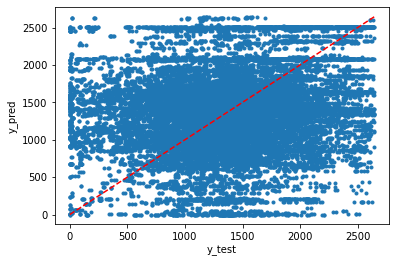


n_neighbors = 2
    Root Mean Squared Error: 665.6962209148218
    Mean Absolute Error: 515.2557570532929


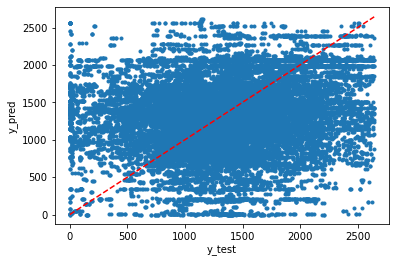


n_neighbors = 3
    Root Mean Squared Error: 649.3538002437659
    Mean Absolute Error: 502.08014515678303


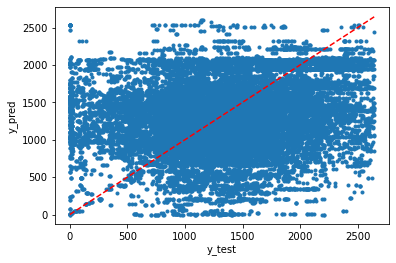


n_neighbors = 4
    Root Mean Squared Error: 647.9228482042577
    Mean Absolute Error: 507.7046705334898


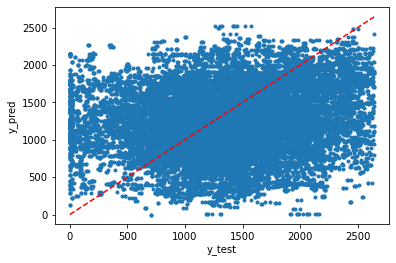


n_neighbors = 5
    Root Mean Squared Error: 633.7473321932868
    Mean Absolute Error: 498.158113479171


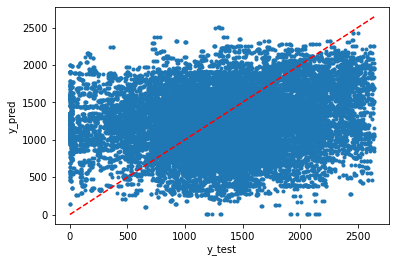


n_neighbors = 6
    Root Mean Squared Error: 627.2421917463553
    Mean Absolute Error: 493.575826620905


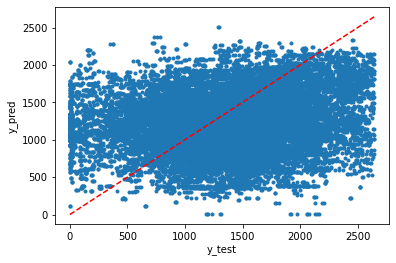


n_neighbors = 7
    Root Mean Squared Error: 618.9614567905942
    Mean Absolute Error: 487.764803332329


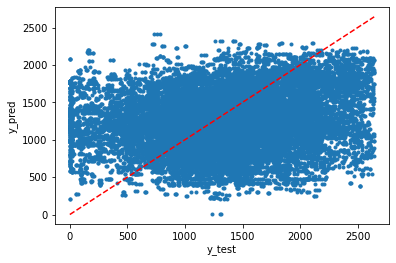


n_neighbors = 8
    Root Mean Squared Error: 613.7193954324642
    Mean Absolute Error: 484.2370592913792


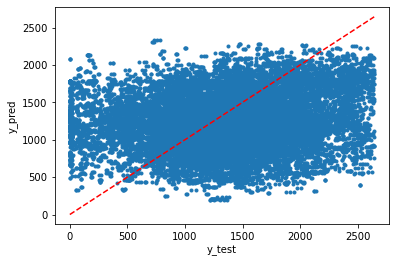


n_neighbors = 9
    Root Mean Squared Error: 611.4780615897391
    Mean Absolute Error: 482.54389154421233


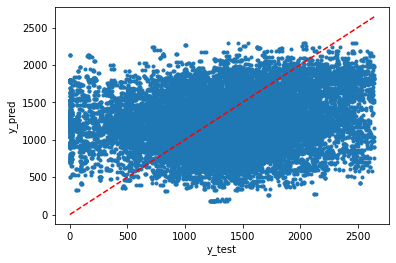


n_neighbors = 10
    Root Mean Squared Error: 607.7369359085608
    Mean Absolute Error: 480.2273484516573


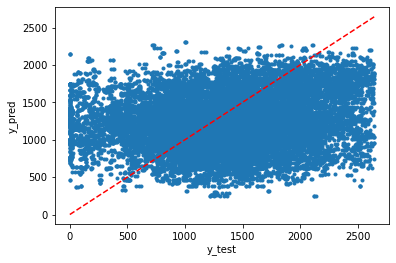

In [108]:
for num in range(1, 11):
    print(f"n_neighbors = {num}")
    evaluate(KNeighborsRegressor(n_neighbors = num))
    print()

n_neighbors = 1
    Root Mean Squared Error: 701.3083570014088
    Mean Absolute Error: 540.4751682878522


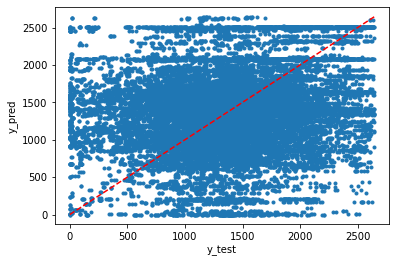


n_neighbors = 11
    Root Mean Squared Error: 604.9727325935205
    Mean Absolute Error: 478.7530802888524


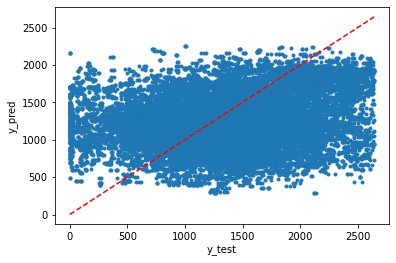


n_neighbors = 21
    Root Mean Squared Error: 585.1438929968306
    Mean Absolute Error: 463.55552345384694


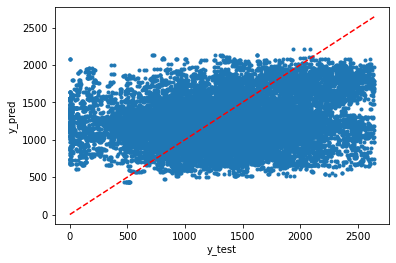


n_neighbors = 31
    Root Mean Squared Error: 581.7293430393181
    Mean Absolute Error: 461.289184462371


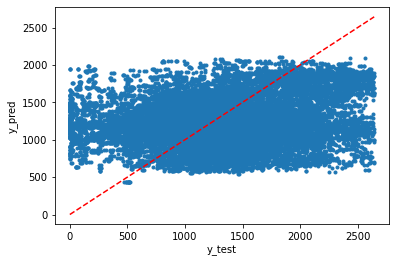


n_neighbors = 41
    Root Mean Squared Error: 577.6302854610456
    Mean Absolute Error: 457.9126232381963


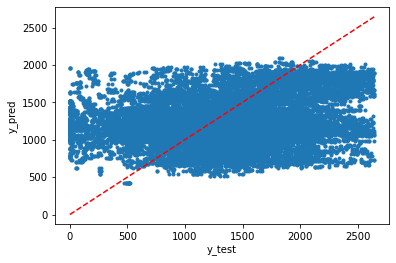


n_neighbors = 51
    Root Mean Squared Error: 574.4082091852315
    Mean Absolute Error: 455.4257079301754


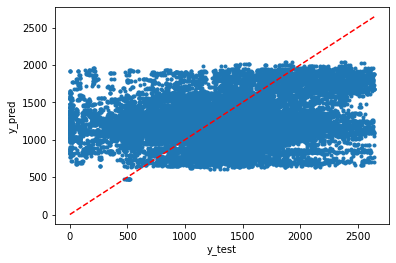


n_neighbors = 61
    Root Mean Squared Error: 573.6690969343234
    Mean Absolute Error: 454.7382922168344


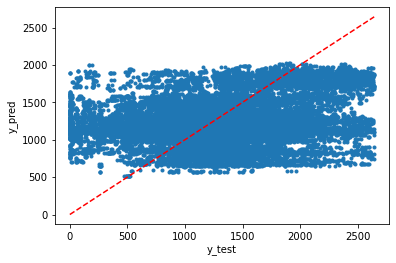


n_neighbors = 71
    Root Mean Squared Error: 573.6435195214286
    Mean Absolute Error: 454.6006877274619


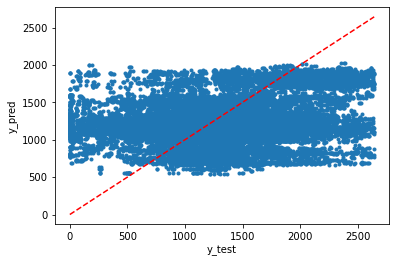


n_neighbors = 81
    Root Mean Squared Error: 572.8601558466638
    Mean Absolute Error: 454.17434198178273


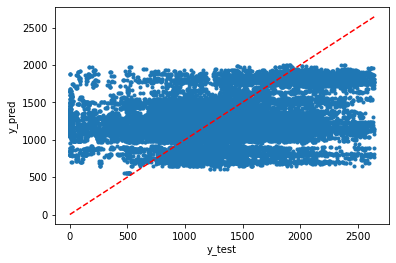


n_neighbors = 91
    Root Mean Squared Error: 572.7797327133641
    Mean Absolute Error: 454.1619874986206


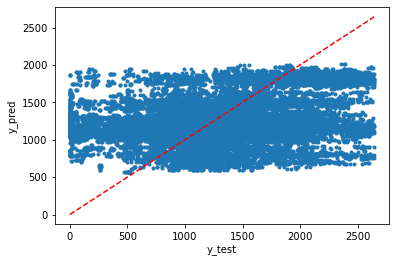


n_neighbors = 101
    Root Mean Squared Error: 572.1370661671931
    Mean Absolute Error: 453.50836580443416


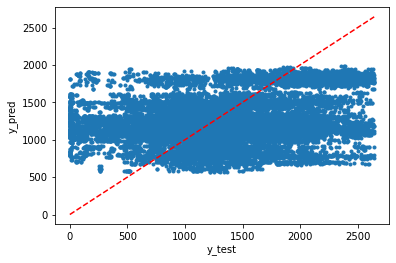

In [104]:
num_arr = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
for num in num_arr:
    print(f"n_neighbors = {num}")
    evaluate(KNeighborsRegressor(n_neighbors = num))
    print()

n_neighbors = 101
    Root Mean Squared Error: 572.1370661671931
    Mean Absolute Error: 453.50836580443416


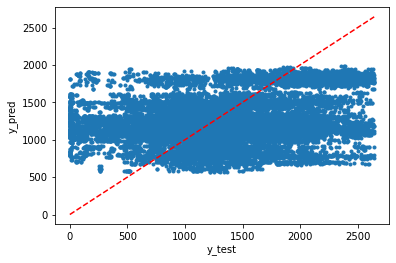


n_neighbors = 501
    Root Mean Squared Error: 563.7582436251151
    Mean Absolute Error: 445.6132255295446


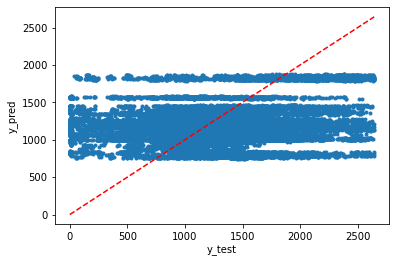


n_neighbors = 901
    Root Mean Squared Error: 552.0088686679281
    Mean Absolute Error: 435.1297144327357


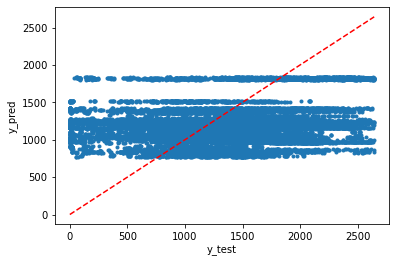

In [105]:
num_arr = [101, 501, 901]
for num in num_arr:
    print(f"n_neighbors = {num}")
    evaluate(KNeighborsRegressor(n_neighbors = num))
    print()

In [97]:
df_train.iloc[:,-17:].corrwith(df_train["Zori"])

CPI                             0.130818
Revenue Per Capita (dollars)    0.132420
population                      0.266093
violent_crime                   0.262040
homicide                        0.218062
rape                            0.220761
robbery                         0.278689
aggravated_assault              0.254870
property_crime                  0.252592
burglary                        0.234492
larceny                         0.238737
motor_vehicle_theft             0.304744
GDP                             0.295021
state_personal_consumption      0.291657
Per capita personal income      0.310003
Personal income                 0.301672
Unemployment Rates             -0.046751
dtype: float64

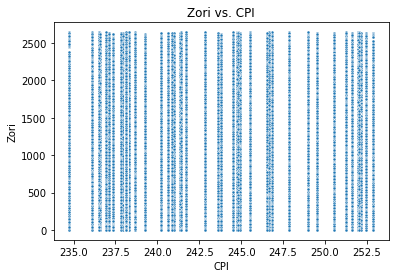

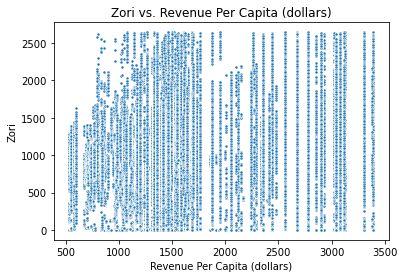

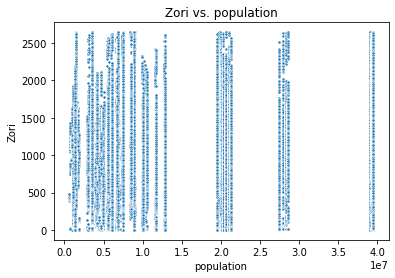

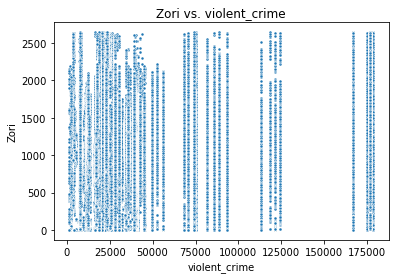

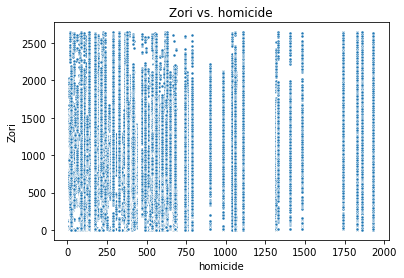

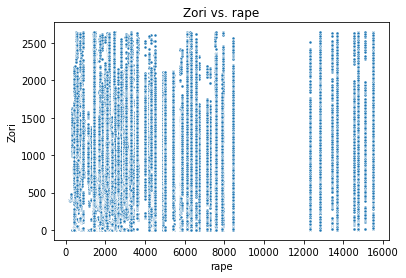

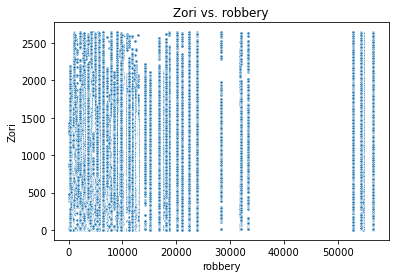

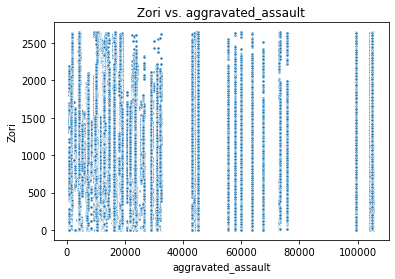

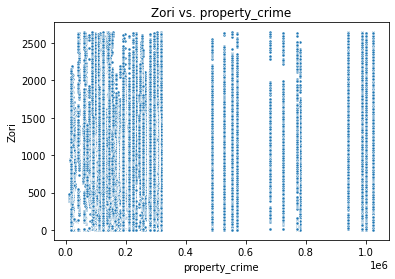

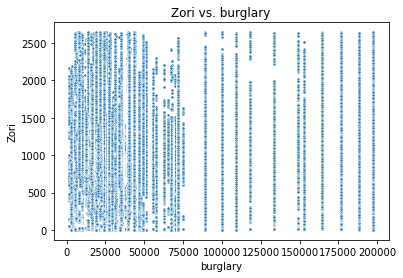

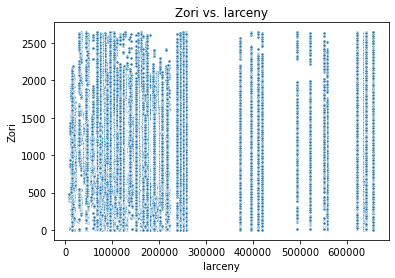

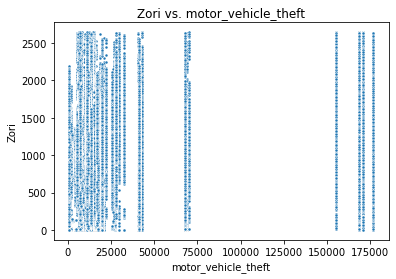

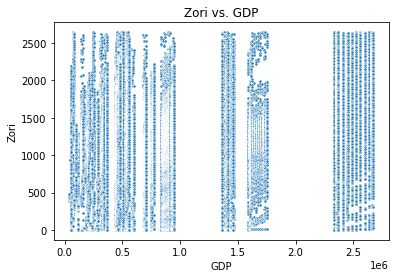

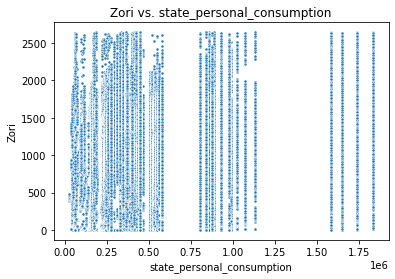

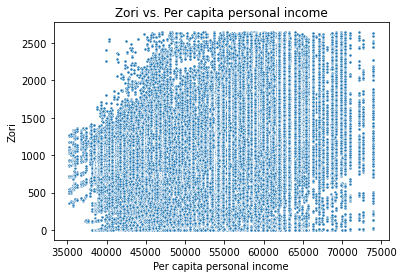

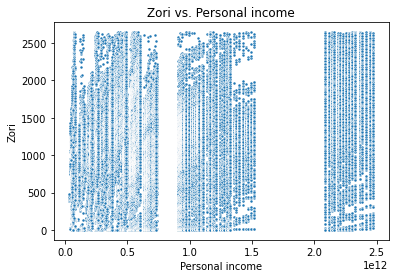

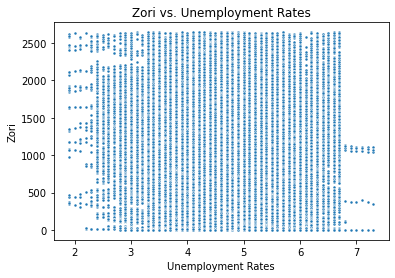

In [96]:
for i, feature_x in enumerate(df_train.columns.values[-17:]):
    plt.figure(i)
    ax = sns.scatterplot(x=feature_x, y="Zori", data=df_train, marker='.')
    ax.set_title(f"Zori vs. {feature_x}")
    ax.set_xlabel(feature_x);